In [4]:
import numpy as np 
import pandas as pd 

def converterTempo(data):
    if(len(data) == 10):
        minutes = float(data[0:2])
        seconds = float(data[3:9])
        minutes = minutes*60
        
    if(len(data) == 9):
        minutes = float(data[0:1])
        seconds = float(data[3:8])
        minutes = minutes*60
    
    if(len(data) == 8):
        minutes = float(data[0:1])
        seconds = float(data[2:7])
        minutes = minutes*60
    
    return minutes + seconds

malhas = [1000, 2000, 3000]
flags = [0, 1, 2, 3]


In [2]:
temposNoFlag = []
eficienciasNoFlag = []
speedupsNoFlag = []

for malha in malhas:
    file = pd.read_csv(f'{malha}/noFlags.out', header = None, sep='\s+')
    
    if ',' in file[1][0]:
        tempo = file[1][0].replace(',', '.')
    else:
        tempo = file[1][0]
    
    tempo = converterTempo(tempo)
    temposNoFlag.append(tempo)
    
for i in range(np.size(malhas)):
    eficienciasNoFlag.append((1 - (temposNoFlag[i]/temposNoFlag[0]))*100)
    
for i in range(np.size(malhas)):
    speedupsNoFlag.append((temposNoFlag[0]/temposNoFlag[i]))
       
print(temposNoFlag)
print(eficienciasNoFlag)
print(speedupsNoFlag)

[128.568, 541.642, 1314.99]
[0.0, -321.2883454669902, -922.7972745939891]
[1.0, 0.23736711702563687, 0.09777108571167842]


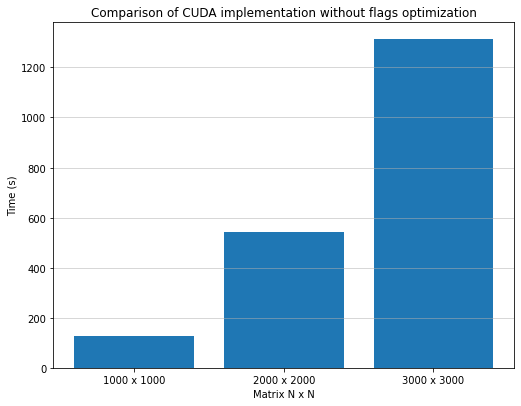

In [66]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

axes.bar(malhasLabel, temposNoFlag)

axes.set_xlabel('Matrix N x N')
axes.set_ylabel("Time (s)")

axes.set_title(f'Comparison of CUDA implementation without flags optimization')

plt.xticks(malhasLabel)
plt.grid(axis='y', linestyle='-', linewidth=0.5)
# axes.legend(loc='center right')

plt.savefig(f'plotTemposMalhas.png', dpi=400)

In [8]:
temposFlagFast = []
eficienciasFlagFast = []
speedupsFlagFast = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_fast_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        # print(tempo[0:1])
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagFast.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagFast[i][j]/temposFlagFast[i][0]))*100)
        
    eficienciasFlagFast.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagFast[i][0]/temposFlagFast[i][j]))
        
    speedupsFlagFast.append(aux)
    aux = []

print(temposFlagFast)
print(eficienciasFlagFast)
print(speedupsFlagFast)        

[[122.392, 69.19800000000001, 68.55199999999999, 65.219], [486.503, 367.827, 362.689, 366.124], [1383.732, 1035.89, 1038.223, 997.135]]
[[0.0, 43.46199097980259, 43.989803255114715, 46.71302045885353], [0.0, 24.393683081090966, 25.449791676515865, 24.743732309975474], [0.0, 25.137960240855882, 24.969358228327454, 27.938719347388073]]
[[1.0, 1.7687216393537384, 1.785389193604855, 1.876631043100937], [1.0, 1.3226408066835769, 1.3413778747080831, 1.3287929772426827], [1.0, 1.3357904796841362, 1.332788813193312, 1.3877077827977153]]


In [10]:
temposFlagHost = []
eficienciasFlagHost = []
speedupsFlagHost = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagHost.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagHost[i][j]/temposFlagHost[i][0]))*100)
        
    eficienciasFlagHost.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagHost[i][0]/temposFlagHost[i][j]))
        
    speedupsFlagHost.append(aux)
    aux = []

print(temposFlagHost)
print(eficienciasFlagHost)
print(speedupsFlagHost)        

[[120.704, 64.329, 67.412, 66.153], [540.424, 362.725, 364.164, 363.453], [1444.948, 1023.231, 1052.216, 1001.518]]
[[0.0, 46.70516304347826, 44.15098091198303, 45.1940283669141], [0.0, 32.88140423075214, 32.61513182242092, 32.74669518748242], [0.0, 29.18561775233435, 27.179663212793827, 30.688301585939428]]
[[1.0, 1.8763543658381134, 1.7905417433097963, 1.8246186869832053], [1.0, 1.4899000620304637, 1.4840126975758174, 1.4869157772806938], [1.0, 1.4121425171833146, 1.373242756240164, 1.4427578935176402]]


In [11]:
temposFlagDevice = []
eficienciasFlagDevice = []
speedupsFlagDevice = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_G_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagDevice.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagDevice[i][j]/temposFlagDevice[i][0]))*100)
        
    eficienciasFlagDevice.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagDevice[i][0]/temposFlagDevice[i][j]))
        
    speedupsFlagDevice.append(aux)
    aux = []

print(temposFlagDevice)
print(eficienciasFlagDevice)
print(speedupsFlagDevice)        

[[124.86, 121.055, 120.754, 123.26], [481.089, 487.823, 540.677, 543.344], [1359.082, 1407.952, 1377.099, 1375.551]]
[[0.0, 3.0474131026749895, 3.288483101073203, 1.2814352074323243], [0.0, -1.399741004263233, -12.386065779928469, -12.940433059163702], [0.0, -3.5958095243701083, -1.32567424187795, -1.2117738296879565]]
[[1.0, 1.031431993721862, 1.034003014392898, 1.0129806912218076], [1.0, 0.9861958128255536, 0.8897900225088176, 0.8854224947731086], [1.0, 0.9652900098867008, 0.986916699525597, 0.9880273432246425]]


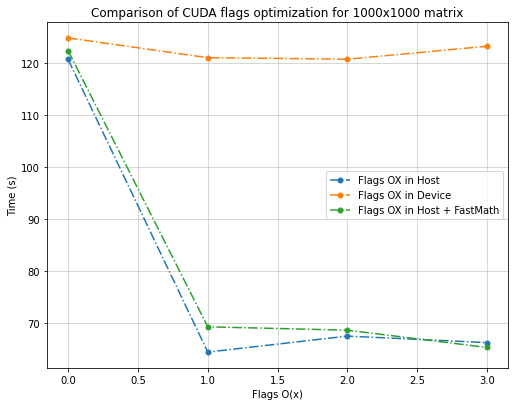

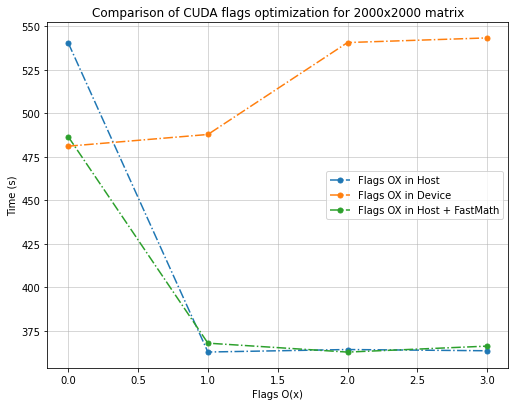

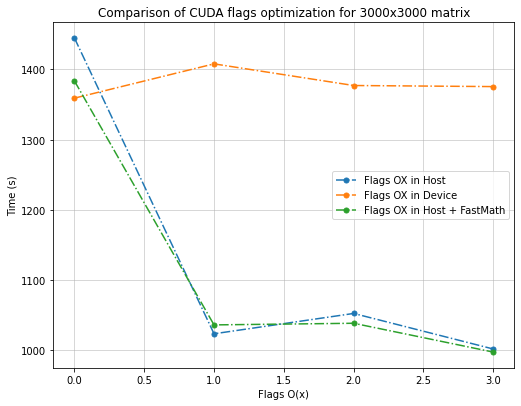

In [15]:
import matplotlib.pyplot as plt

for i in range(np.size(malhas)):
    
    malha = malhas[i]
    fig1 = plt.figure(figsize=(8,6))
    x=np.arange(0,50,2)
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])

    axes.plot(flags, temposFlagHost[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host")
    axes.plot(flags, temposFlagDevice[i], ls='-.', marker='o',markersize=5, label="Flags OX in Device")
    axes.plot(flags, temposFlagFast[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host + FastMath")

    axes.set_xlabel('Flags O(x)')
    axes.set_ylabel("Time (s)")

    axes.set_title(f'Comparison of CUDA flags optimization for {malha}x{malha} matrix')

    plt.grid(linestyle='-', linewidth=0.5)
    axes.legend(loc='center right')

    plt.savefig(f'plotTemposFlagsParaMalha{malha}.png', dpi=400)

In [37]:
melhoresTemposPorMalha = []
melhoresEficienciasPorMalha = []
melhoresSpeedupsPorMalha = []
melhoresNumeros = []

melhoresTemposNoFlag = []
melhoresTemposFlagHost = []
melhoresTemposFlagDevice = []
melhoresTemposFlagFast = []

aux = []

for i in range(np.size(malhas)):
    aux.append(temposNoFlag[i])
    melhoresTemposNoFlag.append(temposNoFlag[i])
    
    aux.append(min(temposFlagHost[i]))
    melhoresTemposFlagHost.append(min(temposFlagHost[i]))
    aux.append(min(temposFlagDevice[i]))
    melhoresTemposFlagDevice.append(min(temposFlagDevice[i]))
    aux.append(min(temposFlagFast[i]))
    melhoresTemposFlagFast.append(min(temposFlagFast[i]))

    melhoresTemposPorMalha.append(aux)
    aux = []
    
    aux.append(eficienciasNoFlag[i])
    
    aux.append(max(eficienciasFlagHost[i]))
    aux.append(max(eficienciasFlagDevice[i]))
    aux.append(max(eficienciasFlagFast[i]))
    
    melhoresEficienciasPorMalha.append(max(aux))
    aux = []
    
    aux.append(speedupsNoFlag[i])
    
    aux.append(max(speedupsFlagHost[i]))
    aux.append(max(speedupsFlagDevice[i]))
    aux.append(max(speedupsFlagFast[i]))
    
    melhoresSpeedupsPorMalha.append(max(aux))
    aux = []
    
print(melhoresTemposNoFlag)
print(melhoresTemposFlagHost)
print(melhoresTemposFlagDevice)
print(melhoresTemposFlagFast)
print(melhoresTemposPorMalha)
print(melhoresEficienciasPorMalha)
print(melhoresSpeedupsPorMalha)

[128.568, 541.642, 1314.99]
[64.329, 362.725, 1001.518]
[120.754, 481.089, 1359.082]
[65.219, 362.689, 997.135]
[[128.568, 64.329, 120.754, 65.219], [541.642, 362.725, 481.089, 362.689], [1314.99, 1001.518, 1359.082, 997.135]]
[46.71302045885353, 32.88140423075214, 30.688301585939428]
[1.876631043100937, 1.4899000620304637, 1.4427578935176402]


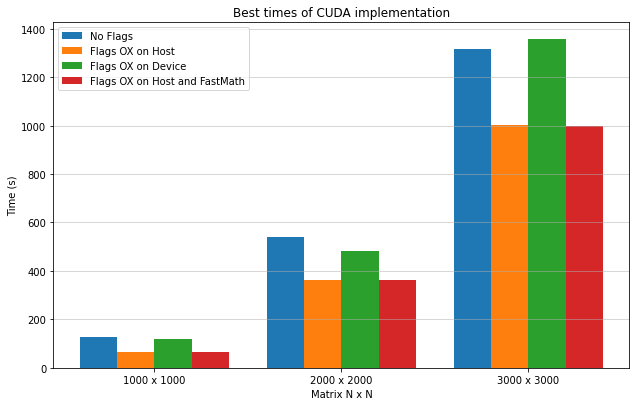

In [67]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.20

fig1 = plt.figure(figsize=(10,6))

r1 = np.arange(len(melhoresTemposNoFlag))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

axes.bar(r1, melhoresTemposNoFlag, width=barWidth, label="No Flags")
axes.bar(r2, melhoresTemposFlagHost, width=barWidth, label="Flags OX on Host")
axes.bar(r3, melhoresTemposFlagDevice, width=barWidth, label="Flags OX on Device")
axes.bar(r4, melhoresTemposFlagFast, width=barWidth, label="Flags OX on Host and FastMath")
    
axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth + barWidth/2 for r in range(len(melhoresTemposNoFlag))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Best times of CUDA implementation')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotMelhoresTemposPorMalha.png', dpi=400)